## Data Practicum II
## Title - Stock Price Prediction
### Author- Akhila Pulipati

### Import the libraries

In [1]:
# Import the required libraries
import os  
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from pylab import mpl, plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")

plt.style.use('seaborn')
mpl.rcParams['font.family'] = 'serif'
        
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

C:\Users\apuli\Softwares\anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### Loading the data
The data for the project is collected from yahoo finance site: https://finance.yahoo.com/
- For performing the stock price prediction and for checking seasonality or trends in the data, I have downloaded three companies stock price data - SPY, AMAZON, and GOOGLE.
- The CSV files downloaded from yahoo contains columns like- Date, Open, High, Low, Close, Adj Close, and Volume. In this project we will make use of two columns - Date and Adj Close.
- The below code reads the stock data(adjusted close) for given symbols('SPY', 'AMZN' and 'GOOG') from the CSV files.
- The data is collected between '06/19/2018' and '07/18/2021' dates.

In [2]:
os.environ['MARKET_DATA_DIR'] = 'E:/MS DataScience/DATA_PRACTICUM-II/MY_PROJECT/'

In [3]:
os.environ['MARKET_DATA_DIR']

'E:/MS DataScience/DATA_PRACTICUM-II/MY_PROJECT/'

In [4]:
def symbol_to_path(symbol, base_dir=None): 
    """Return CSV file path given ticker symbol."""  
    if base_dir is None: 
        base_dir = os.environ.get("MARKET_DATA_DIR", "./data/")  
    return os.path.join(base_dir, "{}.csv".format(str(symbol)))

In [5]:
def get_data(symbols, dates, addSPY=True, colname="Adj Close"): 
    """Read stock data (adjusted close) for given symbols from CSV files."""  
    df = pd.DataFrame(index=dates)
    if addSPY and "SPY" not in symbols:  # add SPY for reference, if absent  
        symbols = ["SPY"] + list( 
            symbols  
        )  # handles the case where symbols is np array of 'object' 
 
    for symbol in symbols: 
        df_temp = pd.read_csv( 
            symbol_to_path(symbol),  
            index_col="Date",  
            parse_dates=True, 
            usecols=["Date", colname], 
            na_values=["nan"], 
        ) 
        df_temp = df_temp.rename(columns={colname: symbol})  
        df = df.join(df_temp)
        if symbol == "SPY":  # drop dates SPY did not trade 
            df = df.dropna(subset=["SPY"]) 
 
    return df 

In [6]:
symbols = ['AMZN','GOOG']
startdate = pd.to_datetime('06/19/2018')
enddate = pd.to_datetime('07/18/2021')
dates = pd.date_range(startdate,enddate,freq='d')
df = get_data(symbols, dates, addSPY=True, colname="Adj Close")

### Exploratory Data Analysis
- Print the first 10 rows of the data.

In [7]:
df.head(10)

,SPY,AMZN,GOOG
2018-06-19,260.981842,1734.780029,1168.060059
2018-06-20,261.427124,1750.079956,1169.839966
2018-06-21,259.788269,1730.219971,1157.660034
2018-06-22,260.261932,1715.670044,1155.479980
2018-06-25,256.718964,1663.150024,1124.810059
2018-06-26,257.287384,1691.089966,1118.459961
2018-06-27,255.155945,1660.510010,1103.979980
2018-06-28,256.614807,1701.449951,1114.219971
2018-06-29,256.984253,1699.800049,1115.650024
2018-07-02,257.533691,1713.780029,1127.459961


- The dataset contains 3 columns- SPY, AMZN, and GOOG with 775 rows. Here the index is DatetimeIndex, which means we are dealing with time series data.

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 775 entries, 2018-06-19 to 2021-07-16
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   SPY     775 non-null    float64
 1   AMZN    775 non-null    float64
 2   GOOG    775 non-null    float64
dtypes: float64(3)
memory usage: 44.2 KB


#### Check for null values
- There are no null values in the dataset.

In [9]:
# Check for null values
df.isnull().sum()

SPY     0
AMZN    0
GOOG    0
dtype: int64

### Data Visualization

**SPY Closing Price**
- Below graph shows that there is a small drop during the end of 2018 and a sudden drop in stock price during April 2020 (2020-04). And we can see a gradual increase from November 2020 (2020-11).

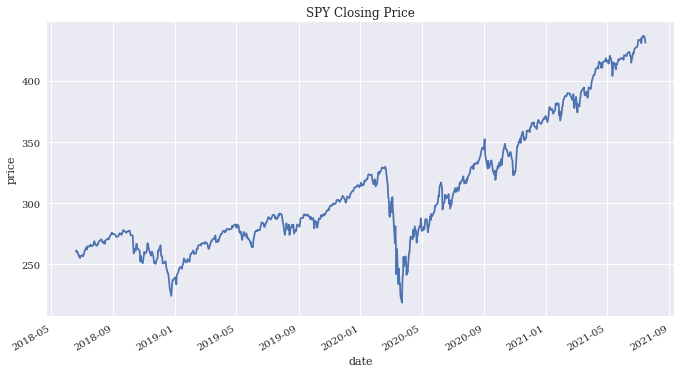

In [10]:
df.SPY.plot(figsize=(10, 6), title = 'SPY Closing Price')
plt.xlabel('date')
plt.ylabel('price')
plt.show()

**Amazon Closing Price**
- The amazon closing price graphs shows that there is a little drop during dec 2018 and a sudden drop during april 2020 and after that we can see a gradual increase in the price. we can observe noise in the graph from mid of 2020, it might be because of more stock trading.

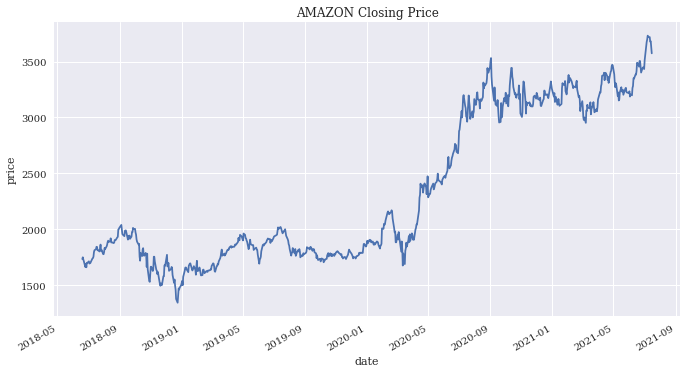

In [11]:
df.AMZN.plot(figsize=(10, 6), title ='AMAZON Closing Price')
plt.xlabel('date')
plt.ylabel('price')
plt.show()

**Google Closing Price**
- The stock price of google is also some what similar to the other once which we have seen earlier. There is a drop in stock price during the early 2020 and steady increase in it afterwards.

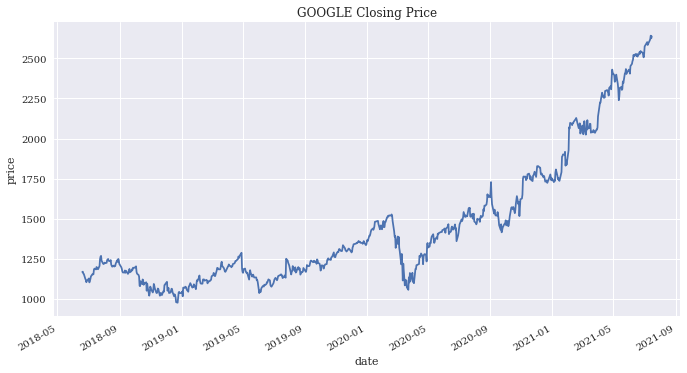

In [12]:
df.GOOG.plot(figsize=(10, 6), title ='GOOGLE Closing Price')
plt.xlabel('date')
plt.ylabel('price')
plt.show()

**Closing Price of SPY, AMAZON and GOOGLE**
- From the below graph we can compare the closing price for all the given companies.
- As we can see Amazon stock price is much higher than the other two. 
- All the 3 stock prices are dropped at the same time i.e. during the early 2020's, this might be because of the COVID effect on the stock price.

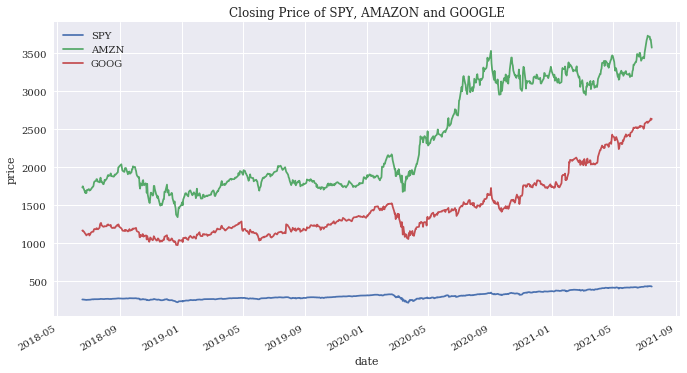

In [13]:
df.plot(figsize=(10, 6), title = 'Closing Price of SPY, AMAZON and GOOGLE')
plt.xlabel('date')
plt.ylabel('price')
plt.show()

In [14]:
# column means
df.mean() # defaults to axis=0.

SPY      310.399474
AMZN    2336.205584
GOOG    1454.481553
dtype: float64

In [15]:
# Standard deviation
df.std()

SPY      51.849056
AMZN    676.403845
GOOG    409.424144
dtype: float64

### Normalized data

In [16]:
start_val = 1000000

allocs = [0.4, 0.4, 0.1]  # percent of portfolio in each stock.  40% to SPY, 40% AMZN, etc

k=252  # daily k, for weekly data use 52

normed = df/df.iloc[0]  # normed df has first row of all ones


In [17]:
# First 10 rows of Normalized dataset
normed.head(10)

,SPY,AMZN,GOOG
2018-06-19,1.000000,1.000000,1.000000
2018-06-20,1.001706,1.008820,1.001524
2018-06-21,0.995427,0.997371,0.991096
2018-06-22,0.997242,0.988984,0.989230
2018-06-25,0.983666,0.958709,0.962973
2018-06-26,0.985844,0.974815,0.957536
2018-06-27,0.977677,0.957188,0.945140
2018-06-28,0.983267,0.980787,0.953906
2018-06-29,0.984683,0.979836,0.955131
2018-07-02,0.986788,0.987895,0.965241


### Plot graph for Normalized data
- Here it is easy to compare the different stock prices after normalizing the data. 
- We can see all the 3 stock prices are almost going in the same way until early 2020 and after that there is a normal increase in all the stock prices and a spike in amazon stock price. From mid 2021 google stock price is really higher than the others.

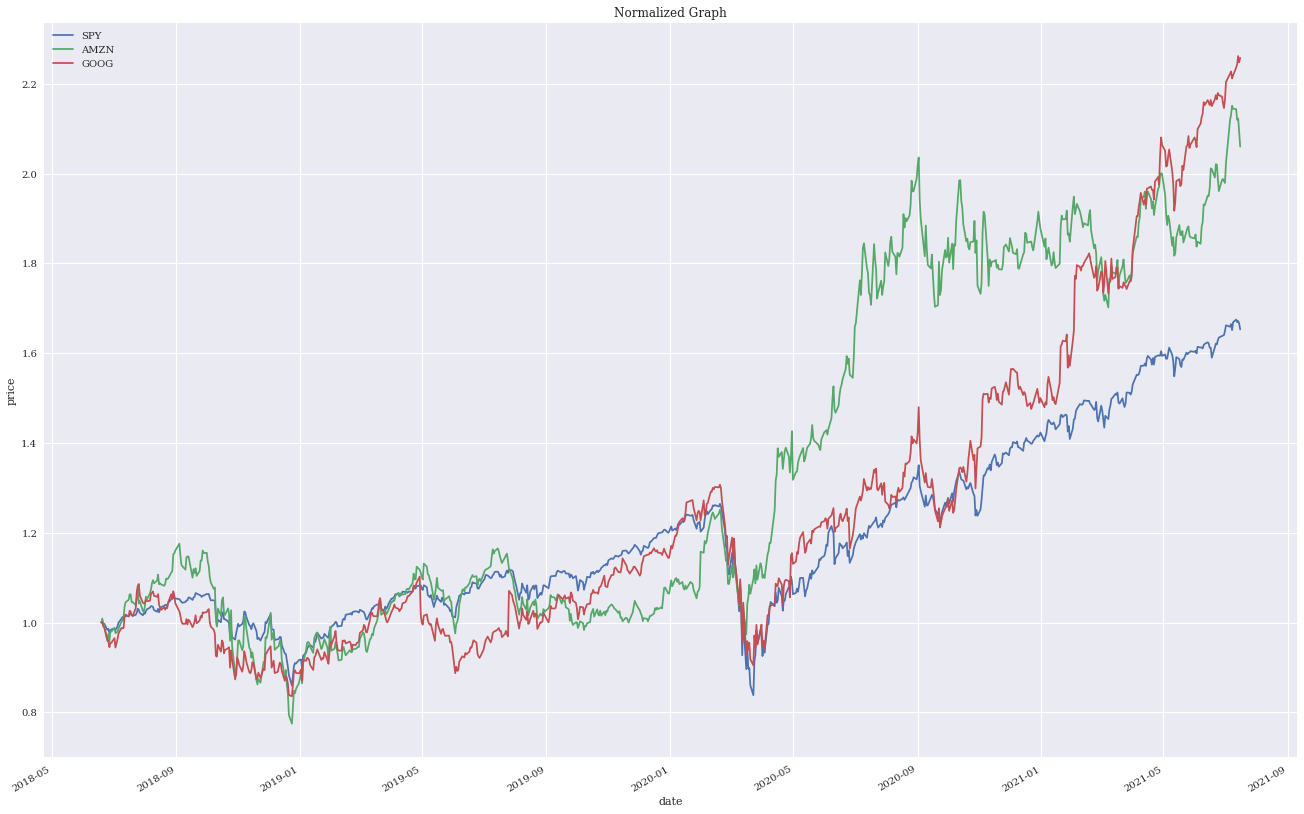

In [18]:
normed.plot(figsize = (20,15), title = 'Normalized Graph')
plt.xlabel('date')
plt.ylabel('price')
plt.show()

In [19]:
alloced = normed * allocs  # normed times the percent allocation for each stock

In [20]:
pos_vals = alloced * start_val  # allocation times the start value of each stock.  Subsequent rows show new value

In [21]:
port_val = pos_vals.sum(axis=1)  # sum columns, each row has total value of portfolio for that day

print("portfolio value:\n",port_val)

portfolio value:
 2018-06-19    9.000000e+05
2018-06-20    9.043627e+05
2018-06-21    8.962288e+05
2018-06-22    8.934133e+05
2018-06-25    8.732475e+05
                  ...     
2021-07-12    1.750869e+06
2021-07-13    1.739825e+06
2021-07-14    1.743680e+06
2021-07-15    1.728360e+06
2021-07-16    1.710851e+06
Length: 775, dtype: float64


In [22]:
daily_rets = (df / df.shift(1)) - 1

daily_rets = daily_rets[1:]  # first row is always zero.  This just includes second row on in the df

cum_ret = (port_val[-1]/port_val[0] - 1)  # cumulative return.  Change in value from beginning to end

print("Cumulative return:\n",cum_ret)

Cumulative return:
 0.9009453010673065


In [23]:
# average daily return
avg_daily_ret = daily_rets.mean()  

print("Average Daily return:\n",avg_daily_ret)

Average Daily return:
 SPY     0.000749
AMZN    0.001143
GOOG    0.001236
dtype: float64


In [24]:
# std dev of daily return
std_daily_ret = daily_rets.std()    

print("Average std:\n",std_daily_ret)

Average std:
 SPY     0.014042
AMZN    0.020449
GOOG    0.019140
dtype: float64


In [25]:
daily_rf = 0

SR = np.sqrt(k) * np.mean(daily_rets - daily_rf) / np.std(daily_rets)  # Sharpe ratio.  k is number of samples per year.

print("Sharpes ratio:\n", SR)

Sharpes ratio:
 SPY     0.846798
AMZN    0.887581
GOOG    1.025418
dtype: float64


In [26]:
daily_returns = (df / df.shift(1)) - 1 # df.shift(1) pushes who df down one row and leaves NaN in first row.   daily_returns.iloc[0, :] = 0 # Pandas leaves the 0th row full of Nans

- SPY and amazon has thin tails, google has fat tails.

In [27]:
df.kurtosis()  # positive means fat tails, negative means thin tails

SPY    -0.350819
AMZN   -1.451572
GOOG    0.715433
dtype: float64

### Correlation Matrix
- There is a strong correlation between three stock prices.

In [28]:
# correlation matrix for all the columns in df
df.corr(method='pearson')  

,SPY,AMZN,GOOG
SPY,1.000000,0.881073,0.973484
AMZN,0.881073,1.000000,0.862275
GOOG,0.973484,0.862275,1.000000


### Simple Moving Average
- Trading based on simple moving averages (SMAs) is a decades-old trading approach. The analysts in finance often evaluate statistical metrics continually over a slide window of time, which is called moving window calculations.
- Below we have calculated SMA values for two different rolling window sizes, Shorter SMA value = 20, and longer SMA value = 100.
- Moving averages helps smooth out any spikes or fluctuations in data and provide smooth curve for the performance of the companies. Going further we can visualize the differences in curves.

In [29]:
df1 = normed

- Here we calculated shorter SMA and longer SMA for SPY, Amazon, and Google, and plotted for the companies separately.

In [30]:
SMA1 = 20
SMA2 = 100

df1['SPY_SMA1'] = df1['SPY'].rolling(SMA1).mean()  
df1['SPY_SMA2'] = df1['SPY'].rolling(SMA2).mean() 

df1['GOOG_SMA1'] = df1['GOOG'].rolling(SMA1).mean()  
df1['GOOG_SMA2'] = df1['GOOG'].rolling(SMA2).mean() 

df1['AMZN_SMA1'] = df1['AMZN'].rolling(SMA1).mean()  
df1['AMZN_SMA2'] = df1['AMZN'].rolling(SMA2).mean() 


In [31]:
# maintaining Seperate columns for plotting SPY, amazon and Google stock prices and with respective rolling means.
SPY_rolling = ['SPY', 'SPY_SMA1', 'SPY_SMA2']
GOOG_rolling = ['GOOG', 'GOOG_SMA1', 'GOOG_SMA2']
AMZN_rolling =['AMZN','AMZN_SMA1','AMZN_SMA2']

**SPY stock price and two simple moving averages**
- We can see three time series of SPY visually. We can observe that the SPY_SMA1 and SPY_SMA2 have smooth curves without any fluctuations.

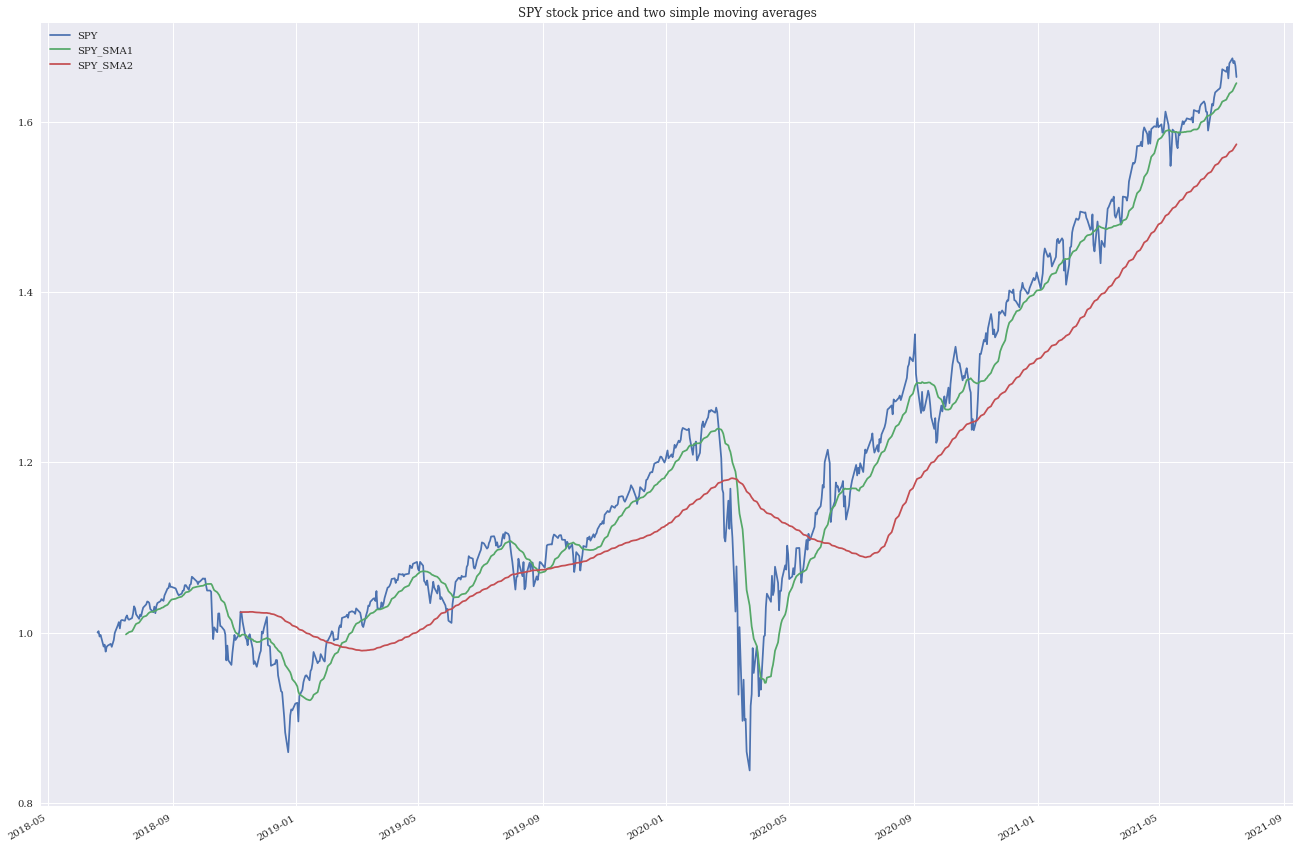

In [32]:
df1[SPY_rolling].plot(figsize= (20, 16), title ='SPY stock price and two simple moving averages')

**GOOGLE stock price and two simple moving averages**
- We can see three time series of GOOGLE visually. We can observe that the GOOG_SMA1 and GOOG_SMA2 have smooth curves without any fluctuations.

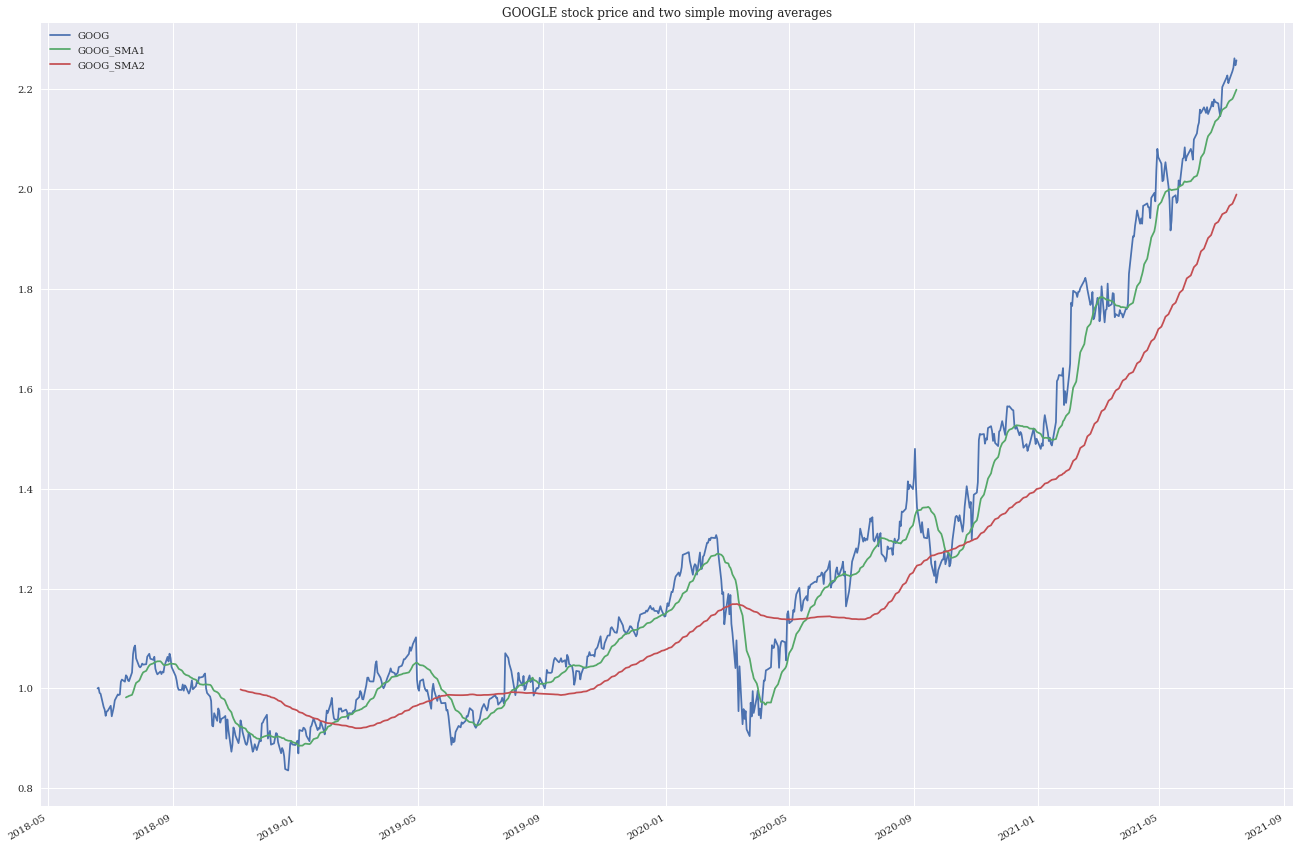

In [33]:
df1[GOOG_rolling].plot(figsize= (20, 16), title ='GOOGLE stock price and two simple moving averages')

**AMAZON stock price and two simple moving averages**
- We can see three time series of AMAZON visually. <br>
**In all the graphs of SMA's we can see the difference like how the spikes in data are consumed and result in a general sentiment around the performance of the stock.**

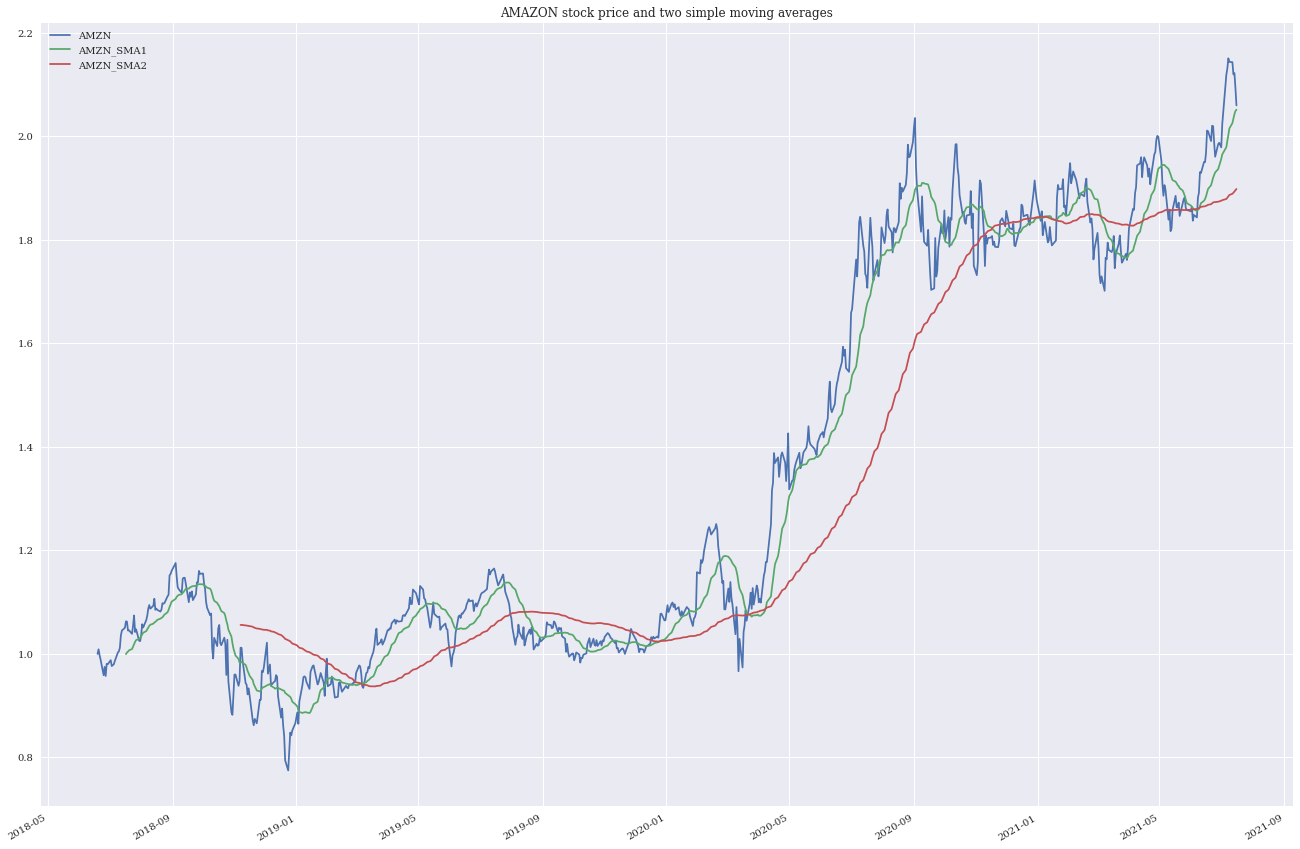

In [34]:
df1[AMZN_rolling].plot(figsize= (20, 16), title ='AMAZON stock price and two simple moving averages')

**Stock Prices and two moving averages for all the data**
- Below figures shows the two moving averages for all the different companies in one graph. It's bit hard to understand everything in a single graph.

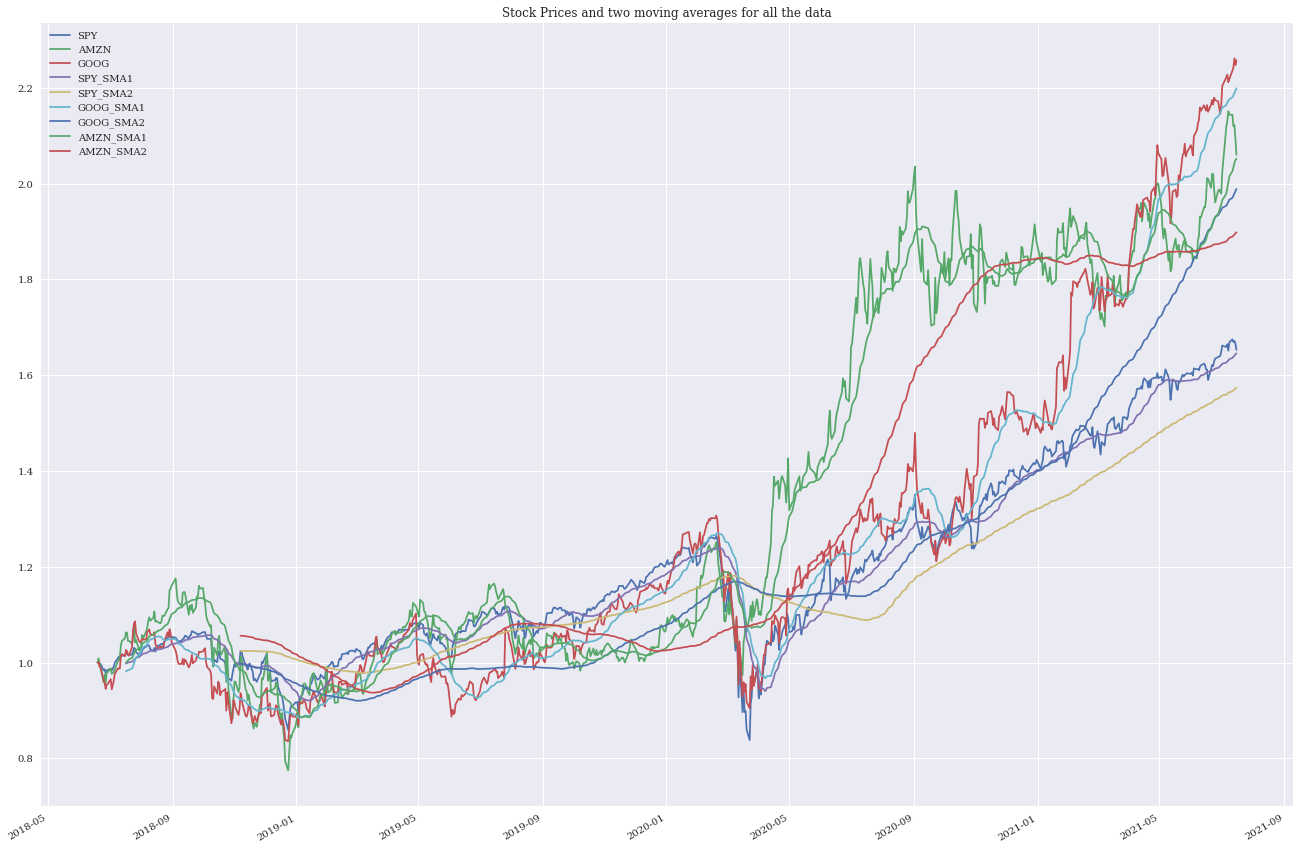

In [35]:
df1.plot(figsize= (20, 16), title ='Stock Prices and two moving averages for all the data')

In [36]:
df1.head(5) # display first 5 rows of present data

,SPY,AMZN,GOOG,SPY_SMA1,SPY_SMA2,GOOG_SMA1,GOOG_SMA2,AMZN_SMA1,AMZN_SMA2
2018-06-19,1.000000,1.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN
2018-06-20,1.001706,1.008820,1.001524,NaN,NaN,NaN,NaN,NaN,NaN
2018-06-21,0.995427,0.997371,0.991096,NaN,NaN,NaN,NaN,NaN,NaN
2018-06-22,0.997242,0.988984,0.989230,NaN,NaN,NaN,NaN,NaN,NaN
2018-06-25,0.983666,0.958709,0.962973,NaN,NaN,NaN,NaN,NaN,NaN


### Deviation of Positions
The trading rules are:
1. Go long (= +1) when the shorter SMA is above the longer SMA.
2. Go short (= -1) when the shorter SMA is below the longer SMA

In [37]:
df1.dropna(inplace = True) 

df1['SPY_Position'] = np.where(df1['SPY_SMA1'] > df1['SPY_SMA2'], 1, -1)
df1['GOOG_Position'] = np.where(df1['GOOG_SMA1'] > df1['GOOG_SMA2'], 1, -1) 
df1['AMZN_Position'] = np.where(df1['AMZN_SMA1'] > df1['AMZN_SMA2'], 1, -1)

In [38]:
# maintaining Seperate columns for plotting SPY, amazon and Google stock prices and with respective rolling means and positions.
SPY_position =['SPY', 'SPY_SMA1', 'SPY_SMA2','SPY_Position']
GOOG_position =['GOOG','GOOG_SMA1', 'GOOG_SMA2', 'GOOG_Position']
AMZN_position =['AMZN','AMZN_SMA1','AMZN_SMA2','AMZN_Position']

**SPY stock price, two SMAs and resulting positions**
- From the below graph we can observe that from the past three years, the strategy leads to three periods during which the SPY stock should be shorted, the differences in the performance can only result from these three periods. 

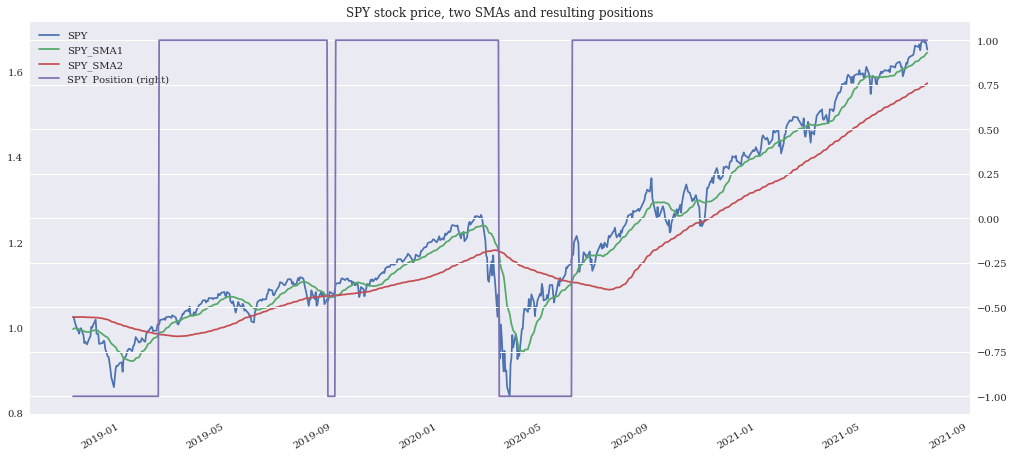

In [39]:
ax = df1[SPY_position].plot(secondary_y='SPY_Position', figsize=(15, 8), title ='SPY stock price, two SMAs and resulting positions')
ax.get_legend();

**GOOGLE stock price, two SMAs and resulting positions**
- The strategy leads to four periods during which the google stock price have been shorted in the past three years, the differences in performance can only lead from these four periods.

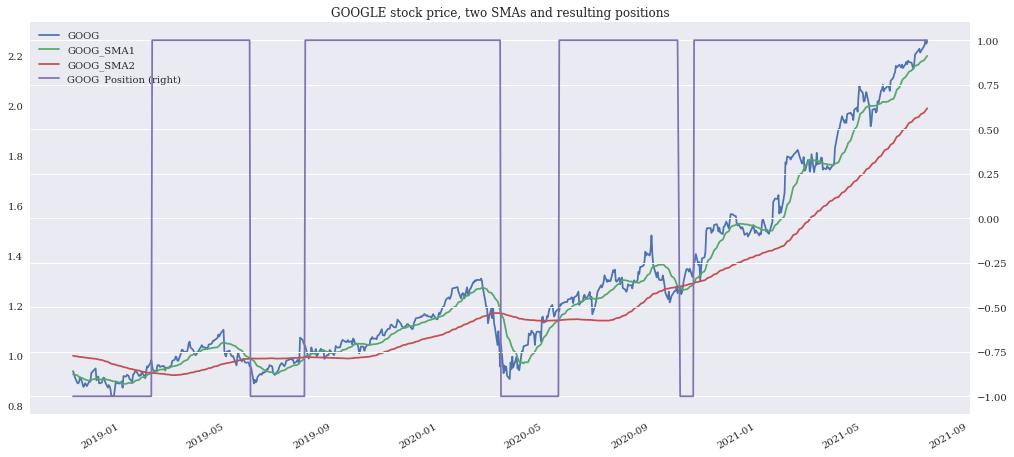

In [40]:
ax = df1[GOOG_position].plot(secondary_y='GOOG_Position', figsize=(15, 8), title ='GOOGLE stock price, two SMAs and resulting positions')
ax.get_legend();

**AMAZON stock price, two SMAs and resulting positions**
- The amazon stock price performance is bit different while compared with the other two. The strategy shows seven periods during which the amazon stock price have been shorted.

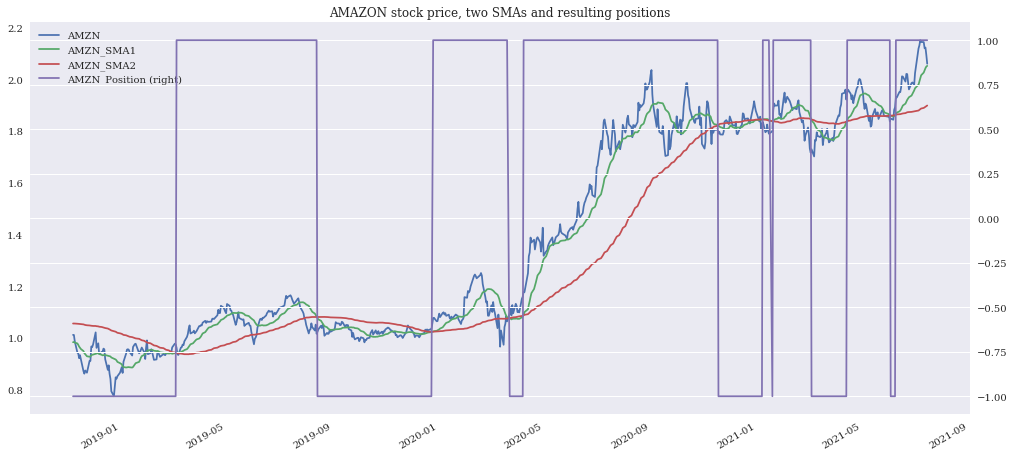

In [41]:
ax = df1[AMZN_position].plot(secondary_y='AMZN_Position', figsize=(15, 8), title ='AMAZON stock price, two SMAs and resulting positions')
ax.get_legend();

### Vectorized Backtesting
**Vectorized Backtesting for SPY stock**
- In the vectorized backtesting first we calculate the log returns. Next, the positionings, represented as +1 and -1 are multiplied with relevant returns.
- Here the long position earns the positive return of stock price and short position earns the negative return of stock price

In [42]:
df1['SPY_Returns'] = np.log(df1['SPY'] / df1['SPY'].shift(1)) # log return of SPY stock  

df1['SPY_Strategy'] = df1['SPY_Position'].shift(1) * df1['SPY_Returns']   #Multiplies the position values, shifted by one day, by the log returns of the SPY stock; the shift is required to avoid a foresight bias

df1.round(4).head()


,SPY,AMZN,GOOG,SPY_SMA1,SPY_SMA2,GOOG_SMA1,GOOG_SMA2,AMZN_SMA1,AMZN_SMA2,SPY_Position,GOOG_Position,AMZN_Position,SPY_Returns,SPY_Strategy
2018-11-07,1.0246,1.0119,0.9361,0.9959,1.0238,0.9236,0.9980,0.9836,1.0559,-1,-1,-1,NaN,NaN
2018-11-08,1.0228,1.0116,0.9267,0.9974,1.0240,0.9237,0.9972,0.9846,1.0560,-1,-1,-1,-0.0018,0.0018
2018-11-09,1.0128,0.9871,0.9128,0.9977,1.0241,0.9218,0.9963,0.9824,1.0558,-1,-1,-1,-0.0098,0.0098
2018-11-12,0.9938,0.9435,0.8892,0.9974,1.0241,0.9195,0.9953,0.9789,1.0553,-1,-1,-1,-0.0189,0.0189
2018-11-13,0.9920,0.9403,0.8870,0.9959,1.0241,0.9159,0.9943,0.9734,1.0548,-1,-1,-1,-0.0019,0.0019


- Below we are adding the log return of SPY stock and algorithmic trading strategy based on SMAs and the exponential function applied to arrive at the performance values.

In [43]:
df1.dropna(inplace=True)
# Sums up the log returns for the strategy and the benchmark investment and calculates the exponential value to arrive at the absolute performance.
np.exp(df1[['SPY_Returns', 'SPY_Strategy']].sum())  

SPY_Returns     1.613049
SPY_Strategy    1.184487
dtype: float64

In [44]:
# Calculates the annualized volatility for the strategy and the benchmark investment.
df1[['SPY_Returns', 'SPY_Strategy']].std() * 252 ** 0.5  

SPY_Returns     0.234674
SPY_Strategy    0.234909
dtype: float64

- The numbers shows that our algorithmic trading strategy has not outperformed the benchmark investment of passively holding the SPY stock. we can see that the annualized volatility outperforms the benchmark investment on a risk-adjusted basis.
- The below figure shows the overall performance of the SPY stock and the algorithmic trading strategy over the time.

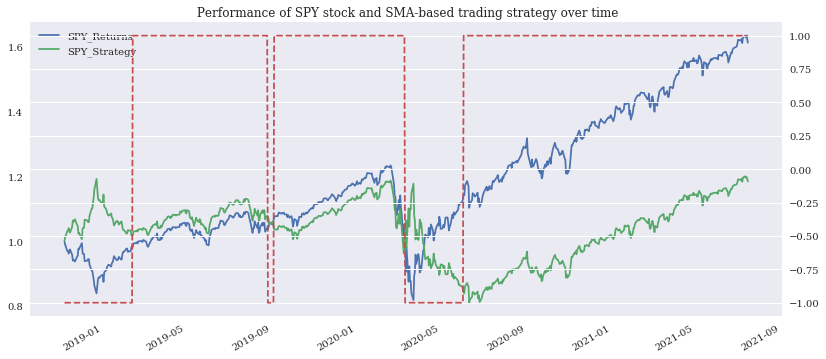

In [45]:
ax = df1[['SPY_Returns', 'SPY_Strategy']].cumsum(
                 ).apply(np.exp).plot(figsize=(12, 6))
df1['SPY_Position'].plot(ax=ax, secondary_y='SPY_Position', style='--', title =' Performance of SPY stock and SMA-based trading strategy over time')
ax.get_legend();

**Vectorized Backtesting for GOOGLE stock**
- Here first the log returns are calculated and then the positions are multiplied with relevant returns.
- The long position earns the positive return of stock price and short position earns the negative return of stock price

In [46]:
df1['GOOG_Returns'] = np.log(df1['GOOG'] / df1['GOOG'].shift(1))  

df1['GOOG_Strategy'] = df1['GOOG_Position'].shift(1) * df1['GOOG_Returns']  

df1.round(4).head()

,SPY,AMZN,GOOG,SPY_SMA1,SPY_SMA2,GOOG_SMA1,GOOG_SMA2,AMZN_SMA1,AMZN_SMA2,SPY_Position,GOOG_Position,AMZN_Position,SPY_Returns,SPY_Strategy,GOOG_Returns,GOOG_Strategy
2018-11-08,1.0228,1.0116,0.9267,0.9974,1.0240,0.9237,0.9972,0.9846,1.0560,-1,-1,-1,-0.0018,0.0018,NaN,NaN
2018-11-09,1.0128,0.9871,0.9128,0.9977,1.0241,0.9218,0.9963,0.9824,1.0558,-1,-1,-1,-0.0098,0.0098,-0.0151,0.0151
2018-11-12,0.9938,0.9435,0.8892,0.9974,1.0241,0.9195,0.9953,0.9789,1.0553,-1,-1,-1,-0.0189,0.0189,-0.0262,0.0262
2018-11-13,0.9920,0.9403,0.8870,0.9959,1.0241,0.9159,0.9943,0.9734,1.0548,-1,-1,-1,-0.0019,0.0019,-0.0025,0.0025
2018-11-14,0.9852,0.9217,0.8935,0.9940,1.0241,0.9128,0.9936,0.9667,1.0544,-1,-1,-1,-0.0069,0.0069,0.0073,-0.0073


In [47]:
df1.dropna(inplace=True)

np.exp(df1[['GOOG_Returns', 'GOOG_Strategy']].sum())  

GOOG_Returns     2.436169
GOOG_Strategy    1.346069
dtype: float64

In [48]:
df1[['GOOG_Returns', 'GOOG_Strategy']].std() * 252 ** 0.5  

GOOG_Returns     0.309514
GOOG_Strategy    0.310146
dtype: float64

- The numbers shows that the algorithmic trading strategy has not performed the benchmark investment of passively holding the Google stock. But the annualized volatility outperforms the benchmark investment on a risk-adjusted basis.
- The below figure shows the overall performance of the Google stock and the algorithmic trading strategy over the time.

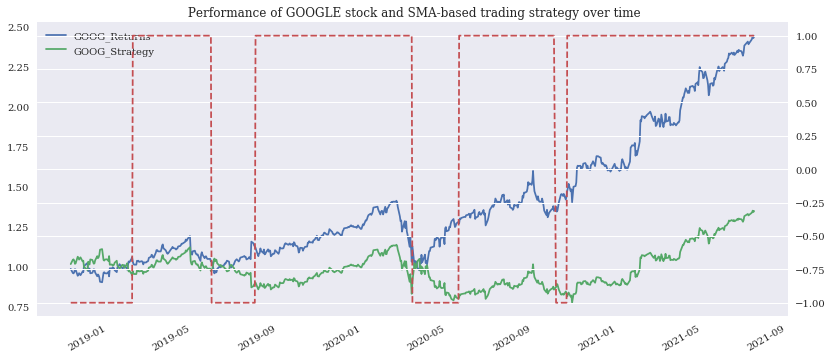

In [49]:
ax = df1[['GOOG_Returns', 'GOOG_Strategy']].cumsum(
                 ).apply(np.exp).plot(figsize=(12, 6))
df1['GOOG_Position'].plot(ax=ax, secondary_y='GOOG_Position', style='--', title =' Performance of GOOGLE stock and SMA-based trading strategy over time')
ax.get_legend();

**Vectorized Backtesting for AMAZON stock**
- First the log returns are calculated and then the positions are multiplied with relevant returns.
- The long position earns the positive return of amazon stock price and short position earns the negative return of amazon stock.

In [50]:
df1['AMZN_Returns'] = np.log(df1['AMZN'] / df1['AMZN'].shift(1))  

df1['AMZN_Strategy'] = df1['AMZN_Position'].shift(1) * df1['AMZN_Returns']  

df1.round(4).head()

,SPY,AMZN,GOOG,SPY_SMA1,SPY_SMA2,GOOG_SMA1,GOOG_SMA2,AMZN_SMA1,AMZN_SMA2,SPY_Position,GOOG_Position,AMZN_Position,SPY_Returns,SPY_Strategy,GOOG_Returns,GOOG_Strategy,AMZN_Returns,AMZN_Strategy
2018-11-09,1.0128,0.9871,0.9128,0.9977,1.0241,0.9218,0.9963,0.9824,1.0558,-1,-1,-1,-0.0098,0.0098,-0.0151,0.0151,NaN,NaN
2018-11-12,0.9938,0.9435,0.8892,0.9974,1.0241,0.9195,0.9953,0.9789,1.0553,-1,-1,-1,-0.0189,0.0189,-0.0262,0.0262,-0.0451,0.0451
2018-11-13,0.9920,0.9403,0.8870,0.9959,1.0241,0.9159,0.9943,0.9734,1.0548,-1,-1,-1,-0.0019,0.0019,-0.0025,0.0025,-0.0035,0.0035
2018-11-14,0.9852,0.9217,0.8935,0.9940,1.0241,0.9128,0.9936,0.9667,1.0544,-1,-1,-1,-0.0069,0.0069,0.0073,-0.0073,-0.0199,0.0199
2018-11-15,0.9955,0.9335,0.9115,0.9934,1.0242,0.9118,0.9931,0.9624,1.0540,-1,-1,-1,0.0104,-0.0104,0.0200,-0.0200,0.0127,-0.0127


In [51]:
df1.dropna(inplace=True)

np.exp(df1[['AMZN_Returns', 'AMZN_Strategy']].sum())  

AMZN_Returns     2.086876
AMZN_Strategy    1.082784
dtype: float64

In [52]:
df1[['AMZN_Returns', 'AMZN_Strategy']].std() * 252 ** 0.5  

AMZN_Returns     0.318298
AMZN_Strategy    0.318766
dtype: float64

- The numbers shows that the algorithmic trading strategy has not well performed the benchmark investment of passively holding the amazon stock. But the annualized volatility outperforms the benchmark investment on a risk-adjusted basis.
- The below figure shows the overall performance of the amazon stock and the algorithmic trading strategy over the time.

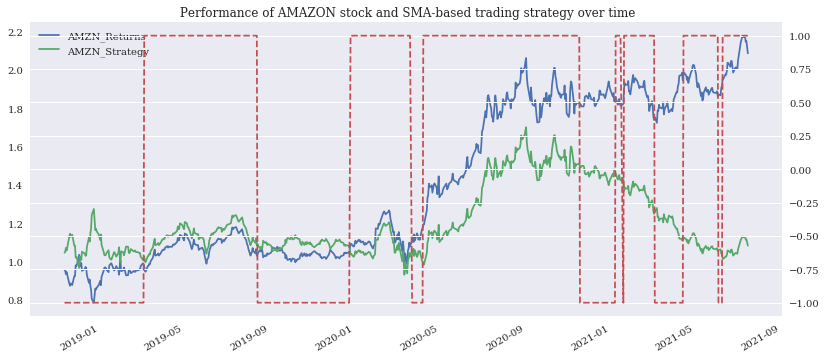

In [53]:
ax = df1[['AMZN_Returns', 'AMZN_Strategy']].cumsum(
                 ).apply(np.exp).plot(figsize=(12, 6))
df1['AMZN_Position'].plot(ax=ax, secondary_y='AMZN_Position', style='--', title =' Performance of AMAZON stock and SMA-based trading strategy over time')
ax.get_legend();

### Optimization
**Optimization of SPY Stock**
- So far we have taken our simple moving average (SMA) values as 20, and 100. Are the chosen SMA parameters are the right ones? Generally, investors prefer higher returns to lower returns ceteris paribus. So, we might be inclined to search for those parameters that maximize the return over the relevant period.
- Now we calculate the whole vectorized backtesting for different parameters combinations for SPY, Google and Amazon stock and records the results, and find a ranking afterward. 
- We have considered the parameter values as sma1 = range(10,61,4) and sma2 = range(20,130,11)

In [54]:
from itertools import product

# parameter values for SMA1 and SMA2
sma1 = range(10,61,4) 
sma2 = range(20,130,11)

results = pd.DataFrame()
for SPY_SMA1, SPY_SMA2 in product(sma1, sma2):  # combine values of SMA1 and SMA2
    data = pd.DataFrame(df['SPY'])
    data.dropna(inplace=True)
    data['SPY_Returns'] = np.log(data['SPY'] / data['SPY'].shift(1))
    data['SPY_SMA1'] = data['SPY'].rolling(SPY_SMA1).mean()
    data['SPY_SMA2'] = data['SPY'].rolling(SPY_SMA2).mean()
    data.dropna(inplace=True)
    data['SPY_Position'] = np.where(data['SPY_SMA1'] > data['SPY_SMA2'], 1, -1)
    data['SPY_Strategy'] = data['SPY_Position'].shift(1) * data['SPY_Returns']
    data.dropna(inplace=True)
    perf = np.exp(data[['SPY_Returns', 'SPY_Strategy']].sum())
    results = results.append(pd.DataFrame(
             {'SPY_SMA1': SPY_SMA1, 'SPY_SMA2': SPY_SMA2,
              'SPY_MARKET': perf['SPY_Returns'],
              'SPY_STRATEGY': perf['SPY_Strategy'],
              'SPY_OUT': perf['SPY_Strategy'] - perf['SPY_Returns']},
               index=[0]), ignore_index= True)   # Records the vectorized backtesting results in a DataFrame object.

In [55]:
results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   SPY_SMA1      130 non-null    int64  
 1   SPY_SMA2      130 non-null    int64  
 2   SPY_MARKET    130 non-null    float64
 3   SPY_STRATEGY  130 non-null    float64
 4   SPY_OUT       130 non-null    float64
dtypes: float64(3), int64(2)
memory usage: 5.2 KB


- The result shows the seven best performing parameter combinations of all the backtested. Ranking is implemented based on the outperformance of algorithmic trading strategy compared with benchmark investment. The benchmark investment performance varies as the SMA2 parameter influences the time interval length and data set on which the backtest implemented.

In [56]:
results.sort_values('SPY_OUT', ascending=False).head(7)

,SPY_SMA1,SPY_SMA2,SPY_MARKET,SPY_STRATEGY,SPY_OUT
52,30,42,1.602954,1.664518,0.061565
43,26,53,1.568444,1.605702,0.037258
33,22,53,1.568444,1.591846,0.023402
22,18,42,1.602954,1.617715,0.014761
42,26,42,1.602954,1.592385,-0.010569
15,14,75,1.553829,1.510510,-0.043320
62,34,42,1.602954,1.524988,-0.077966


- From the SPY optimization, we get SMA1 = 30 and SMA2 = 42 as the optimal parameters, which leads to a performance of 72 percentage points. The results of optimization are mainly dependent on the dataset and are heavily prone to overfitting.

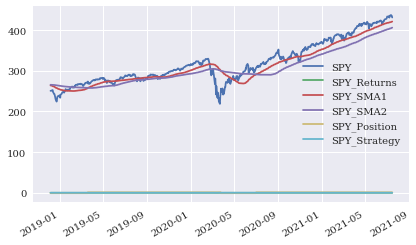

In [57]:
data.plot()

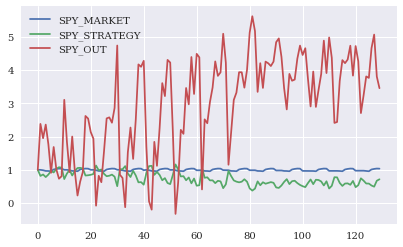

In [58]:
result = results/results.iloc[0] 
result[['SPY_MARKET', 'SPY_STRATEGY','SPY_OUT']].plot()

**Optimization of Google stock**

In [59]:
# parameter values for SMA1 and SMA2
sma1 = range(10,61,4) 
sma2 = range(20,130,11)
results = pd.DataFrame()
for GOOG_SMA1, GOOG_SMA2 in product(sma1, sma2):  # combine values of SMA1 and SMA2
    data = pd.DataFrame(df['GOOG'])
    data.dropna(inplace=True)
    data['GOOG_Returns'] = np.log(data['GOOG'] / data['GOOG'].shift(1))
    data['GOOG_SMA1'] = data['GOOG'].rolling(GOOG_SMA1).mean()
    data['GOOG_SMA2'] = data['GOOG'].rolling(GOOG_SMA2).mean()
    data.dropna(inplace=True)
    data['GOOG_Position'] = np.where(data['GOOG_SMA1'] > data['GOOG_SMA2'], 1, -1)
    data['GOOG_Strategy'] = data['GOOG_Position'].shift(1) * data['GOOG_Returns']
    data.dropna(inplace=True)
    perf = np.exp(data[['GOOG_Returns', 'GOOG_Strategy']].sum())
    results = results.append(pd.DataFrame(
             {'GOOG_SMA1': GOOG_SMA1, 'GOOG_SMA2': GOOG_SMA2,
              'GOOG_MARKET': perf['GOOG_Returns'],
              'GOOG_STRATEGY': perf['GOOG_Strategy'],
              'GOOG_OUT': perf['GOOG_Strategy'] - perf['GOOG_Returns']},
              index=[0]), ignore_index=True)   # Records the vectorized backtesting results in a DataFrame object.

In [60]:
results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   GOOG_SMA1      130 non-null    int64  
 1   GOOG_SMA2      130 non-null    int64  
 2   GOOG_MARKET    130 non-null    float64
 3   GOOG_STRATEGY  130 non-null    float64
 4   GOOG_OUT       130 non-null    float64
dtypes: float64(3), int64(2)
memory usage: 5.2 KB


In [61]:
results.sort_values('GOOG_OUT', ascending=False).head(7)

,GOOG_SMA1,GOOG_SMA2,GOOG_MARKET,GOOG_STRATEGY,GOOG_OUT
3,10,53,2.164613,2.560518,0.395905
4,10,64,2.270810,2.357248,0.086438
32,22,42,2.185604,1.963104,-0.222501
2,10,42,2.185604,1.917244,-0.268360
14,14,64,2.270810,1.965299,-0.305511
24,18,64,2.270810,1.957677,-0.313133
12,14,42,2.185604,1.805775,-0.379829


- From the google data optimization, we get SMA1 = 10 and SMA2 = 53 as the optimal parameters, which leads to a performance of 63 percentage points. The results of optimization are mainly dependent on the given dataset.

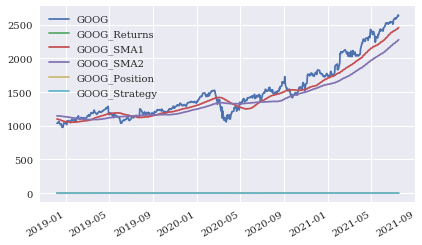

In [62]:
data.plot()

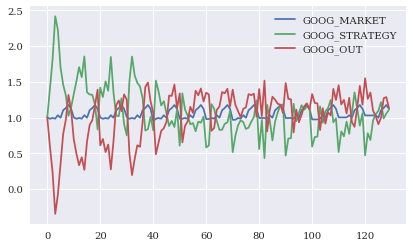

In [63]:
result = results/results.iloc[0] 
result[['GOOG_MARKET', 'GOOG_STRATEGY','GOOG_OUT']].plot()

**Optimization of Amazon stock**

In [64]:
# parameter values for SMA1 and SMA2
sma1 = range(10,61,4) 
sma2 = range(20,130,11)
results = pd.DataFrame()
for AMZN_SMA1, AMZN_SMA2 in product(sma1, sma2):   # combine values of SMA1 and SMA2
    data = pd.DataFrame(df['AMZN'])
    data.dropna(inplace=True)
    data['AMZN_Returns'] = np.log(data['AMZN'] / data['AMZN'].shift(1))
    data['AMZN_SMA1'] = data['AMZN'].rolling(AMZN_SMA1).mean()
    data['AMZN_SMA2'] = data['AMZN'].rolling(AMZN_SMA2).mean()
    data.dropna(inplace=True)
    data['AMZN_Position'] = np.where(data['AMZN_SMA1'] > data['AMZN_SMA2'], 1, -1)
    data['AMZN_Strategy'] = data['AMZN_Position'].shift(1) * data['AMZN_Returns']
    data.dropna(inplace=True)
    perf = np.exp(data[['AMZN_Returns', 'AMZN_Strategy']].sum())
    results = results.append(pd.DataFrame(
             {'AMZN_SMA1': AMZN_SMA1, 'AMZN_SMA2': AMZN_SMA2,
              'AMZN_MARKET': perf['AMZN_Returns'],
              'AMZN_STRATEGY': perf['AMZN_Strategy'],
              'AMZN_OUT': perf['AMZN_Strategy'] - perf['AMZN_Returns']},
              index=[0]), ignore_index=True)   # Records the vectorized backtesting results in a DataFrame object.

In [65]:
results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   AMZN_SMA1      130 non-null    int64  
 1   AMZN_SMA2      130 non-null    int64  
 2   AMZN_MARKET    130 non-null    float64
 3   AMZN_STRATEGY  130 non-null    float64
 4   AMZN_OUT       130 non-null    float64
dtypes: float64(3), int64(2)
memory usage: 5.2 KB


In [66]:
results.sort_values('AMZN_OUT', ascending=False).head(7)

,AMZN_SMA1,AMZN_SMA2,AMZN_MARKET,AMZN_STRATEGY,AMZN_OUT
114,54,64,1.841081,2.714011,0.872930
110,54,20,1.752200,2.291686,0.539486
61,34,31,1.934044,2.469212,0.535168
104,50,64,1.841081,2.017003,0.175922
124,58,64,1.841081,2.007905,0.166825
90,46,20,1.876020,1.998542,0.122522
71,38,31,1.894518,2.015323,0.120804


- From the Amazon optimization, we get SMA1 = 54 and SMA2 = 64 as the optimal parameters, which leads to a outperformance of 118 percentage points. The results of optimization are mainly dependent on the Amazon dataset and is heavily prone to overfitting.

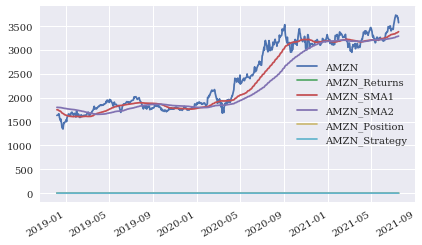

In [67]:
data.plot()

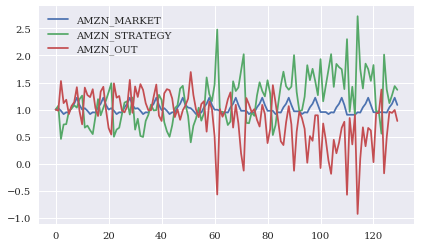

In [68]:
result = results/results.iloc[0] 
result[['AMZN_MARKET', 'AMZN_STRATEGY','AMZN_OUT']].plot()

- As the result of our optimization mainly depend on the given dataset, from the above calculation of optimization of the data for SPY, Amazon and Google, we can observe that Amazon data has outperformed with 118 percentage points with SMA1 as 54 and SMA2 as 64 compared to the SPY/ Google. The selected parameters has performed well on the amazon data. 

### Random Walk Hypothesis
- The random walk hypothesis (RWH) approach says that the predictive approaches should not lead to any outperformance at all. In this project we have tested RWH on historical market price of SPY, where we have created 5 lag versions.
- Next, based on these lagged market prices, the OLS regression is used to predict the market prices.
- With this, the idea is that we can predict today's market price based on yesterday and four more days back market prices. 


#### Create five lagged versions of the historical end-of-day closing levels of the SPY stock index

In [69]:
data = pd.DataFrame(df['SPY'])

lags = 5
cols = []
for lag in range(1, lags + 1):
 col = 'lag_{}'.format(lag)   # Defines a column name for the current lag value.
 data[col] = data['SPY'].shift(lag)  # Creates the lagged version of the market prices for the current lag value.
 cols.append(col)  # Collects the column names for later reference.

data.head(7)

,SPY,lag_1,lag_2,lag_3,lag_4,lag_5
2018-06-19,260.981842,NaN,NaN,NaN,NaN,NaN
2018-06-20,261.427124,260.981842,NaN,NaN,NaN,NaN
2018-06-21,259.788269,261.427124,260.981842,NaN,NaN,NaN
2018-06-22,260.261932,259.788269,261.427124,260.981842,NaN,NaN
2018-06-25,256.718964,260.261932,259.788269,261.427124,260.981842,NaN
2018-06-26,257.287384,256.718964,260.261932,259.788269,261.427124,260.981842
2018-06-27,255.155945,257.287384,256.718964,260.261932,259.788269,261.427124


In [70]:
data.dropna(inplace=True)

In [71]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 770 entries, 2018-06-26 to 2021-07-16
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   SPY     770 non-null    float64
 1   lag_1   770 non-null    float64
 2   lag_2   770 non-null    float64
 3   lag_3   770 non-null    float64
 4   lag_4   770 non-null    float64
 5   lag_5   770 non-null    float64
dtypes: float64(6)
memory usage: 42.1 KB


### Linear OLS Regression
- Here we apply linear regression for predicting the direction of market movements based on historical log returns. The lag_1 represents the log returns of the financial time series lagged by one day and lag_2, lags the log returns by two days. The lagged log returns might be useful in predicting future returns.

In [72]:
data = pd.DataFrame(df['SPY'])
data['returns'] = np.log(data / data.shift(1))
data.dropna(inplace=True)
data['direction'] = np.sign(data['returns']).astype(int)
data.head()

,SPY,returns,direction
2018-06-20,261.427124,0.001705,1
2018-06-21,259.788269,-0.006289,-1
2018-06-22,260.261932,0.001822,1
2018-06-25,256.718964,-0.013707,-1
2018-06-26,257.287384,0.002212,1


#### Frequency distribution of the daily historical log returns for SPY

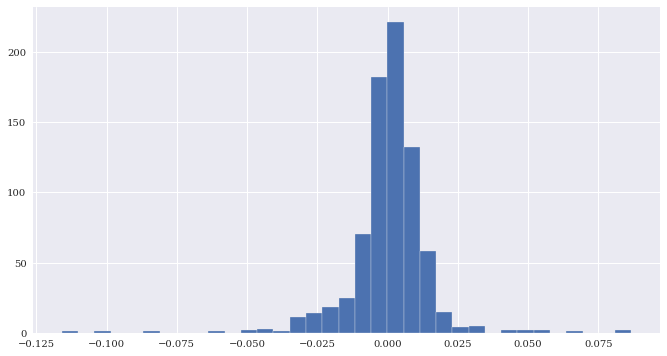

In [73]:
data['returns'].hist(bins=35, figsize=(10, 6))

#### Create the features data by lagging the log returns 

In [74]:
lags = 2
def create_lags(data):
     global cols
     cols = []
     for lag in range(1, lags + 1):
         col = 'lag_{}'.format(lag)
         data[col] = data['returns'].shift(lag)
         cols.append(col)
create_lags(data)
data.head()

,SPY,returns,direction,lag_1,lag_2
2018-06-20,261.427124,0.001705,1,NaN,NaN
2018-06-21,259.788269,-0.006289,-1,0.001705,NaN
2018-06-22,260.261932,0.001822,1,-0.006289,0.001705
2018-06-25,256.718964,-0.013707,-1,0.001822,-0.006289
2018-06-26,257.287384,0.002212,1,-0.013707,0.001822


#### Visualize data with lagging log returns and returns data

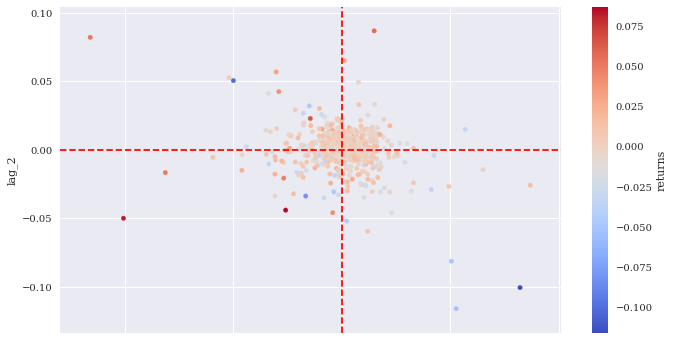

In [75]:
data.dropna(inplace=True)
data.plot.scatter(x='lag_1', y='lag_2', c='returns',
                           cmap='coolwarm', figsize=(10, 6), colorbar=True)
plt.axvline(0, c='r', ls='--')
plt.axhline(0, c='r', ls='--');

### Regression
- The linear OLS Regression is useful in knowing any potential linear relationships for predicting market movements based on the features, and to backtest a trading strategy based on the predictions.
- Generally there are two approaches: 
1. using log returns
2. using direction data as the dependent variable during regression.
- In both the cases predictions are transformed to either +1 or -1 to work with the direction of the prediction.


In [76]:
from sklearn.linear_model import LinearRegression 

model = LinearRegression() # The linear OLS regression implementation from scikit-learn is used.

# The regression is implemented on the log returns directly and on the direction data which is of primary interest.
data['pos_ols_1'] = model.fit(data[cols],
                                       data['returns']).predict(data[cols]) 
data['pos_ols_2'] = model.fit(data[cols],
                                       data['direction']).predict(data[cols])

data[['pos_ols_1', 'pos_ols_2']].head()

,pos_ols_1,pos_ols_2
2018-06-22,0.002235,0.177910
2018-06-25,-0.000593,0.113727
2018-06-26,0.003775,0.213994
2018-06-27,-0.001751,0.088524
2018-06-28,0.002725,0.189279


In [77]:
# the real-valued predictions are transformed to directional values (+1, -1).
data[['pos_ols_1', 'pos_ols_2']] = np.where(
                     data[['pos_ols_1', 'pos_ols_2']] > 0, 1, -1)
data['pos_ols_1'].value_counts()

 1    482
-1    290
Name: pos_ols_1, dtype: int64

In [78]:
data['pos_ols_2'].value_counts() 

 1    749
-1     23
Name: pos_ols_2, dtype: int64

In [79]:
(data['pos_ols_1'].diff() != 0).sum()

479

In [80]:
(data['pos_ols_2'].diff() != 0).sum()

47

In [81]:
data['strat_ols_1'] = data['pos_ols_1'] * data['returns']
data['strat_ols_2'] = data['pos_ols_2'] * data['returns']

data[['returns', 'strat_ols_1', 'strat_ols_2']].sum().apply(np.exp)

returns        1.660352
strat_ols_1    2.815868
strat_ols_2    3.470948
dtype: float64

In [82]:
(data['direction'] == data['pos_ols_1']).value_counts() #Shows the number of correct and false predictions by the strategies.

True     426
False    346
dtype: int64

In [83]:
(data['direction'] == data['pos_ols_2']).value_counts() #Shows the number of correct and false predictions by the strategies.

True     445
False    327
dtype: int64

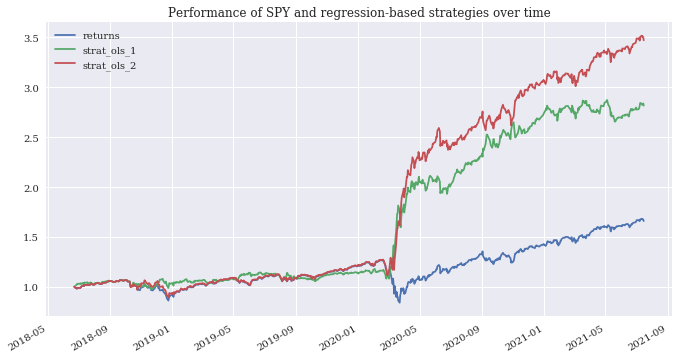

In [84]:
data[['returns', 'strat_ols_1', 'strat_ols_2']].cumsum(
                 ).apply(np.exp).plot(figsize=(10, 6), title ='Performance of SPY and regression-based strategies over time');

- The vectorized backtesting is helpful to judge the performance of the resulting trading strategies. Here both regression-based strategies outperform the benchmark passive investment, while only the strategy trained on the direction of the market shows a positive overall performance from the graph.
- This project will help Someone who is planning to start their own quantitative trading business.


### References:
https://finance.yahoo.com/ <br>
https://learning.oreilly.com/library/view/python-for-finance/9781492024323/ch15.html#ts_clustering
